# Podstawy Sztucznej Inteligencji 2020/2021


Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

# Analiza głównych składowyn (PCA)

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

Mamy zestaw danych będący 40 punktami na płaszczyźnie $(x_i,y_i).$

In [2]:
X = np.empty((40,2))
X[:,0] = np.linspace(-1,1,40)+ np.random.randn(40)*0.1
X[:,1] = 1.1*X[:,0] + np.random.randn(40)*0.2
print(X)

[[-0.85075555 -0.99418141]
 [-0.98000732 -1.24290939]
 [-0.96064166 -0.86958985]
 [-0.8494254  -1.133097  ]
 [-0.78744277 -0.84024224]
 [-0.76798466 -0.85879719]
 [-0.79972583 -1.02968848]
 [-0.61448034 -0.52103541]
 [-0.48632324 -0.37304502]
 [-0.64041113 -0.43833019]
 [-0.37836037 -0.58917565]
 [-0.39983877 -0.24395697]
 [-0.30487403 -0.33251785]
 [-0.22818184 -0.05131717]
 [-0.27801266 -0.1918239 ]
 [-0.33218623 -0.4287052 ]
 [-0.01111356 -0.14426692]
 [-0.11470669  0.11235247]
 [-0.11880484 -0.20711856]
 [-0.01996558  0.11546462]
 [ 0.07814043  0.26421061]
 [-0.01821025 -0.01558863]
 [ 0.35063363  0.31622483]
 [ 0.23585704  0.24948073]
 [ 0.05726806 -0.17664163]
 [ 0.35481634  0.30953593]
 [ 0.38081442 -0.06481417]
 [ 0.26862701  0.10078762]
 [ 0.43200205  0.36641648]
 [ 0.45386189  0.36282426]
 [ 0.54297023  0.20700735]
 [ 0.55827171  0.90501326]
 [ 0.54735582  0.48603539]
 [ 0.81363884  0.75005383]
 [ 0.72651125  0.90038497]
 [ 0.58466515  0.7658047 ]
 [ 0.51583227  0.62795563]
 

## Wstęp


### Macierz kowariancji

  $$ C_{ij} = \frac{1}{N-1}\sum_{k=1}^N{ X_{ki} X_{kj}}$$

###  Oblicz macierz kowariancji z danych zawartych w  `X` korzystając z funkcji `np.cov`.

In [3]:
C = np.cov(X.T)
C

array([[0.33827369, 0.34836091],
       [0.34836091, 0.3907354 ]])

In [4]:
assert C.shape == (2,2)


###  Oblicz macierz kowariancji z danych zawartych w  `X` korzystając z funkcji `np.mean` `np.sum`

In [84]:
# def kowariancja(X):
#     N = X.shape[0]
#     m = np.mean(X, axis=0)
#     return (1/N-1) * (np.dot((X - m).T, X - m))

def kowariancja(X):
    m = np.mean(X, axis=0)
    C = 1/(X.shape[0] - 1) * np.dot((X - m).T, X - m)
    return C

In [85]:
np.testing.assert_almost_equal(kowariancja(X), np.cov(X.T))

import inspect
blacklist = ["cov","corrcoef"]
assert all([ not keyword  in inspect.getsource(kowariancja) for keyword in blacklist])

### Wartości i wektory własne

Narysujmy dane


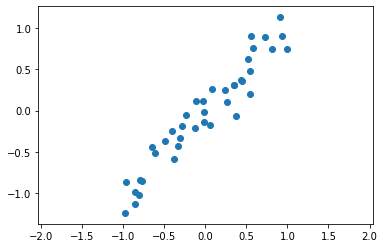

In [7]:
plt.figure()
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(X[:,0],X[:,1])

### Zagadnienie własne

Szukamy takich liczb $\lambda_i$ i wektorów $x_i$ by zachodziło:
$$ C x_i = \lambda_i x_i $$


W numpy mamy gotową funkcję obliczającą liczby $\lambda_i$ i wektory $x_i$:

In [8]:
val, ev =  np.linalg.eig(C)


### Sprawdźmy rachunkiem równanie własne:

Niech `lam` będzie wartością własną a `vec` wektorem:

In [19]:
lam = val[1]
vec = ev[:,1]

To zachodzi:
    
`np.dot(C,vec) == lam*vec`

In [20]:
np.testing.assert_allclose(np.dot(C,vec), lam*vec)
assert abs(lam)>1e-6

Dodajmy na rysunku wektory własne:

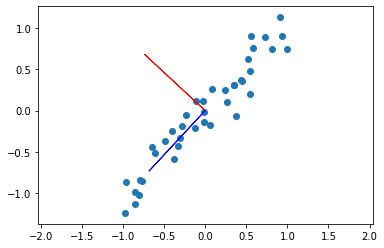

In [22]:
plt.figure()
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(X[:,0],X[:,1])

plt.arrow(0,0,ev[0,0],ev[1,0],color='r')
plt.arrow(0,0,ev[0,1],ev[1,1],color='b')

Sprawdźmy jeszcze,  że wektory własne odpowiadające różnym wartościom własnym są ortogonalne.
    
    

In [23]:
np.testing.assert_approx_equal( np.dot(ev[:,0],ev[:,0]), 1)
np.testing.assert_approx_equal( np.dot(ev[:,0],ev[:,1]), 0)

## Implementacja PCA krok po kroku

Wykonamy redukcję PCA 13 wymiarowego  zestawu do przestrzeni 3d


Referencyjną implementacją będzie `sklearn.decomposition.PCA`.

Niech:

  - `Xorig`  - dane orginalne (przed PCA)
  - `X` - dane w zredukowanej przestrzeni

Zaimplementujemy taką samą operację konstruując operator rzutowania z 13 do 3 wymiarów z trzech wektorów własnych macierzy kowariancji. Wektory wybierzemy kierując się tym by odpowiadały one największym wartościom własnym.



In [24]:
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

X,y  = datasets.load_wine(return_X_y=True)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

pca = decomposition.PCA(n_components=3)
pca.fit(X)

Xorig = X.copy()
X = pca.transform(X)

In [25]:
Xorig.shape,"->", X.shape

((178, 13), '->', (178, 3))

### Krok 1: oblicz macierz kowariancji

In [65]:
C = np.cov(Xorig.T)

In [66]:
np.testing.assert_approx_equal(C[11,2],0.0039333279)
np.testing.assert_almost_equal(C,np.cov(Xorig.T))

### Krok 2:  Wektory i wartości własne macierzy kowariancji. 

Rozwiązujemy numerycznie zagadnienie własne macierzy $C$:

In [67]:
val, ev =  np.linalg.eig(C)

**Posortuj** wartości i odpowiadające im wektory własne od największej do najmniejszej wartości własnej.

*warto rozważyć zastosowanie* `np.argsort`.

In [68]:
sort_idx = np.argsort(val)[::-1]
val = val[sort_idx]
ev = ev[:, sort_idx]

Pierwsze trzy wartości własne powinny być takie same jak liczby w atrybucie `pca.explained_variance_`

In [69]:
np.testing.assert_allclose(val[-1],0.1039619918207, rtol=1e-5)
np.testing.assert_allclose(pca.explained_variance_, val[:3], rtol=1e-5)

### Krok 3: Stwórz macierz operatora rzutowania z przestrzeni 13d w  3d

Mając jeden znormalizowany wektor własny (13 liczb), iloczyn skalarny tego wektora przez dowolny inny wektor tej samej przestrzeni (13d) można zinterpretować jako rzutowanie. Chcemy rzutować na pierwsze trzy wektory własne - można więc przedstawić to jako operację liniową z macierzą $(13,3)$


Macierz taka składa się z trzech 13 elementowych kolumn, będących wartościami własnymi macierzy kowariancji.

In [70]:
P = ev[:, :3]

In [71]:
P.shape

(13, 3)

W sklearn mamy taką macierz w atrybucie `pca.components_`:

In [72]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

Sprawdźmy czy otrzymamy te same wyniki:

In [76]:
np.testing.assert_almost_equal(np.abs(P.T),np.abs(pca.components_))

### Krok 4: Wykonaj rzutowanie wszytkich  danych z 13d do 3d.

Najpierw dla sprawdzenia wykonamy rzutowanie jeden punkt z 13d do 3d (np. z indeksem  12)

In [77]:
print(Xorig[12])

[ 0.92568536 -0.54429654  0.15894572 -1.04947918 -0.75420173  0.48853108
  0.73362894 -0.57898505  0.3838836   0.23441405  0.84478453  0.40722789
  1.82505483]


In [78]:
x12 = np.dot(Xorig[12], P)

In [79]:
print(x12)

[-2.11346234  0.67570634  0.86508643]


In [80]:
x12.shape = (3,)
np.testing.assert_almost_equal(np.abs(x12), np.abs([-2.11346234,  0.67570634, -0.86508643]))

Możemy teraz wykonać rzutowanie dla wszystkich danych. 

In [81]:
X_3d = np.dot(Xorig, P)

In [82]:
X_3d.shape  == (Xorig.shape[0],3)

np.testing.assert_allclose(np.abs(X_3d[:4]),np.abs([[-3.31675081e+00,  1.44346263e+00, -1.65739045e-01],
       [-2.20946492e+00, -3.33392887e-01, -2.02645737e+00],
       [-2.51674015e+00,  1.03115130e+00,  9.82818670e-01],
       [-3.75706561e+00,  2.75637191e+00, -1.76191842e-01]]), rtol=1e-5 )

Ostatecznie wektor w zredukowanej przestrzeni obliczony przez nas i wektor obliczony przez sklear są takie same.

In [83]:
np.testing.assert_allclose(np.abs(X_3d),np.abs(X), rtol=1e-5)